#### 主要内容
用keras建立了784*10的神经网络进行mnist数据集的简单训练。

#### 用keras进行mnist数据及分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


(60000, 28, 28)


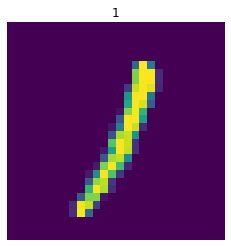

Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.0315 - acc: 0.8168
Epoch 2/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.0183 - acc: 0.8901
Epoch 3/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.0163 - acc: 0.9003
Epoch 4/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.0152 - acc: 0.9059
Epoch 5/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.0146 - acc: 0.9092
Epoch 6/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.0141 - acc: 0.9116
Epoch 7/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.0137 - acc: 0.9140
Epoch 8/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.0134 - acc: 0.9158
Epoch 9/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0132 - acc: 0.9168
Epoch 10/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0130 - acc: 0.9182

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

n = 99
target_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.imshow(x_train[n])
# print(y_train[n])
plt.title(target_name[y_train[n]])
plt.axis('off')
plt.show()

x_train = x_train.reshape(x_train.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0], -1)/255.0
# 把标签值转换为one-hot编码
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# 784 ---> 10
model = Sequential()
model.add(Dense(units=10, input_dim=784, activation='softmax'))
sgd = SGD(lr=0.3)
model.compile(optimizer=sgd, loss='mse',metrics=['accuracy'])    # 有问题，这mse不大合适吧

# 训练模型
model.fit(x_train, y_train, epochs=30)

# 评估模型
loss, accuracy = model.evaluate(x_test, y_test)

print('loss', loss)
print('accuracy', accuracy)